# Projeto Ciência de Dados - Um conjunto de dados estatísticos socioeconômicos de cidades brasileiras
---

Para a realização do projeto da disciplina de Introdução à Ciência de Dados, será desenvolvido um processamento sobre um conjunto de dados socioeconômicos abrangente dos municípios brasileiros. Além disso, a equipe fará comparações desses dados com diferentes questões de economia, pandemia de Covid-19 e o impacto dos governos no período de coleta. A base de dados provém do BRStats, que inclui dados de várias fontes públicas brasileiras, como IBGE, DataSus e IPEA. Para além desses dados, a equipe optou por utilizar outros datasets para enriquecer e realizar extração de dados, que serão discutidos ao longo do processo.


## 🟡 **Questões a serem validadas**
---

Para facilitar a análise do que será avaliado no projeto foram desenvolvidas algumas questões para auxiliar, classificadas nas categorias mencionadas anteriormente.

 **🐮🌱 Produção pecuária e agrícola (Caio e Letícia):**

1. Como a pandemia da COVID-19 afetou as cidades em que grande parte da renda era em torno do turismo?
2.  Ocorreu alguma alteração na produção pecuária e agrícola do período analisado?
3. Como a pandemia de COVID-19 afetou a relação entre a produção agrícola e pecuária?
4. De que maneira a produção e exportação de tais insumos primários impacta na qualidade de vida da população dos municípios descritos no dataset?
5. Estados com maior volume de atividades agropecuárias tendem a ter piores índices de perda e qualidade da água? (Usar o dataset do Diagnóstico dos Serviços de Água e Esgotos do Ministério das Cidades)


**💸🗃Economia e empregabilidade: (Melissa)**

6.  De que maneira o investimento público nos Municípios afeta a empregabilidade destes? Cidades que recebem mais transferências (dinheiro) geram mais empregos?
7.  O crescimento econômico de uma cidade/região possui relação com o seu povoamento? Cidades e regiões mais densamente povoadas possuem um PIB maior? Além disso, elas geram mais empregos?
8. Como a pandemia da COVID-19 afetou as cidades em que grande parte da renda era em torno do turismo?

**📦💰 Dependência financeira dos municípios, relação das transferências e exportações: (Amanda)**

9.  Existe relação entre maior PIB municipal, maior receita própria e menor dependência de transferências correntes e de capital, e o índice de autonomia financeira nos municípios?
10. Existe uma correlação entre as exportações e a produção agrícola e pecuária? Regiões com maior foco nas exportações também são aquelas com maior concentração de atividades do agronegócio?


## 🟢 **Preparação dos Dados**
---

Inicialmente, para a realização deste projeto da disciplina de Introdução à Ciencia de Dados o grupo pensou em um processamento de dados nas áreas de produção pecuária e agrícola, e na área econômica e na avalição das correlações entre ambas.

Na sequência, a equipe tem intenção de compreender o impacto que acontecimentos históricos, como a pandemia do Covid-19 e a mudança de governo (2018-2021), tiveram sobre algumas das mais importantes atividades econômicas do país, como a agricultura, turismo e pecuária, além de analisar o impacto destes na população local dos municípios e estados de maior interesse.

Desta maneira, foi-se discutido quais questões poderiam ser levantadas dentro das áreas mencionadas, bem quais tratamentos e enriquecimentos poderiam ser realizados para a contrusção do projeto.

Por fim, nesta etapa a equipe buscou entender os atributos dos objetos, a tipagem dos atributos, e identificar e tratar possíveis ruídos ou ausência de informações. Além disso, foi realizado a limpeza dos dados considerados desnecessários para as futuras análises.








In [ ]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/BrStats.csv"
dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio


<ipython-input-3-bd24684ef6e4>:6: DtypeWarning: Columns (2,3,4,5,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio


Apos a definição da tematica principal que será abordada no projeto, foi realizada a limpeza dos dados julgados como desnecessários para futuras análises:

## Verificação dos Atributos
O primeiro passo da análise foi a verificação dos dados, identificando quais atributos estavam presentes no dataset. Após essa verificação, foi possível perceber que os nomes das colunas seguiam formatos diferentes. Portanto, com o objetivo de padronização, foi realizada a alteração dos nomes para o formato CamelCase.

Após realizar essa alteração, foi feito um estudo sobre o que cada coluna do dataset:

#### 📍 Dados Temporais e Geográficos
- **Ano** – Período de referência dos dados  
- **CDMunicipio** – Código IBGE do município  
- **Municipio** – Nome do município  
- **UF** – Unidade da Federação (Estado)  
- **Regiao** – Região geográfica  
- **Area** – Área territorial total  
- **Povoamento** – Tipo ou padrão de ocupação territorial  

---

#### 👥 População e Demografia
- **Populacao** – População total  
- **NrNascimentos** – Número de nascimentos  
- **NrObitosInfantis** – Número de óbitos infantis  

---

#### 💼 Economia e Emprego
- **PIB** – Produto Interno Bruto municipal  
- **QtEmpresas** – Quantidade de empresas  
- **PessoalOcupado** – Número de pessoas ocupadas  
- **PessoalAssalariado** – Número de assalariados  
- **VrSalarios** – Valor total dos salários pagos  

---

#### 🏛️ Finanças Públicas
- **ReceitasR\$** - Receita total do município  
- **TransferenciasCorrentesR\$** – Transferências correntes (ex: saúde, educação)  
- **TransferenciasCapitalR\$** – Transferências de capital (ex: investimentos)  

---

#### 🌾 Agropecuária
- **AreaPlantadaH** – Área plantada (em hectares)  
- **AreaColhidaH** – Área colhida (em hectares)  
- **VlProducaoAgricola** – Valor da produção agrícola  
- **VlProducaoPecuaria** – Valor da produção pecuária  

---

#### 🌐 Comércio Exterior
- **ImportacoesUS\$** – Valor total de importações  
- **ExportacoesUS\$** – Valor total de exportações



In [ ]:
#Verificação de atributos
dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao'],
      dtype='object')

## - Período de Análise
Uma das verificações iniciais foi realizada com base no atributo 'ano', com o objetivo de identificar o período inicial e final da coleta de dados, a fim de obter a referência correta de tempo. Como resultado, foi identificado o ano inicial de 2016 e o ano final de 2021, totalizando 6 anos de análise.

Com essa informação, a equipe identificou alguns marcos importantes ao longo do período:

* 2018: Mudança de governo

* 2020-2021: Pandemia de COVID-19

Diante disso, optou-se por abordar esses eventos na análise.





In [ ]:
#Verificação de ano inicial e final
print(dados["Ano"].min())
print(dados["Ano"].max())

2016
2021


##🟠 **Tratamento dos Dados**
---

* Ajuste nos Tipos de Atributos e Valores de Ponto Flutuante:

Para melhor organização dos dados, a equipe optou por substituir os valores "nan" por 0, com exceção das duas últimas colunas, onde essa alteração gerava conflitos devido à presença de "nan" como parte dos nomes de regiões e cidades.

Além disso, para garantir a correta execução dos cálculos, todos os números de ponto flutuante passaram a adotar o ponto (.) como separador decimal, substituindo a vírgula (,).

Durante a análise, identificou-se a necessidade de ajustar os tipos de dados dos atributos, convertendo-os para seus formatos apropriados (float, string ou inteiro). Isso foi necessário porque a maioria dos atributos estava classificada como "object" no conjunto de dados, o que resultava em erros ao manipular as informações.

In [ ]:
for coluna in dados.columns[0:19]:#As duas ultimas colunas sao dos nomes dos municipios e da regiao, nao faz sentido colocar 0
   dados[coluna] = dados[coluna].astype(str).replace("nan", 0)# Substitui valores "nan" por 0

dados = dados.astype(str)  #Transforma tudo em String

dados = dados.replace(r"\.", "", regex=True)
dados= dados.replace(r",", ".", regex=True) #substitui a , por . nos numeros com casas decimais

#Transforma todos atributos em seus devidos tipos (Float, String, Inteiro)
dados[["Importacoes_US$", "Exportacoes_US$", "Populacao", "Area", "Transferencias_correntes_R$", "Transferencias_capital_R$", "povoamento"]] = dados[["Importacoes_US$", "Exportacoes_US$", "Populacao", "Area", "Transferencias_correntes_R$", "Transferencias_capital_R$", "povoamento"]].astype(float) #Transform os atributos especificados em Float
dados[['Ano', 'PessoalOcupado', 'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas', 'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'VlProducaoPecuaria', 'NrNascimentos', 'NrObitosInfantis']] = dados[['Ano', 'PessoalOcupado', 'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas', 'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'VlProducaoPecuaria', 'NrNascimentos', 'NrObitosInfantis']].astype(int) #Transform os atributos especificados em Int

print(dados.dtypes) #Para ver quais sao os tipos de cada atributo


Ano                              int64
CDMunicipio                     object
Populacao                      float64
PessoalOcupado                   int64
PessoalAssalariado               int64
VrSalarios                       int64
PIB                              int64
QtEmpresas                       int64
AreaPlantada_h                   int64
AreaColhida_h                    int64
VlProducaoAgricola               int64
VlProducaoPecuaria               int64
Area                           float64
Importacoes_US$                float64
Exportacoes_US$                float64
Receitas_R$                     object
Transferencias_correntes_R$    float64
Transferencias_capital_R$      float64
NrNascimentos                    int64
NrObitosInfantis                 int64
povoamento                     float64
UF                              object
Municipio                       object
Regiao                          object
dtype: object


* Tratamento dos dados referentes receita, exportação e importação:

A partir da leitura do artigo foi possível observar que muitos objetos possuem os atributos Importacoes_US$, Receitas_R$, Exportacoes_US$ vazios. Desta maneira, pensando em análises mais isoladas desses atributos foi-se escrito o codigo para retirada dos objetos com esses valores vazios

É possível observar a quantidade de dados vazios na seguinte tabela fornecida pelo artigo:

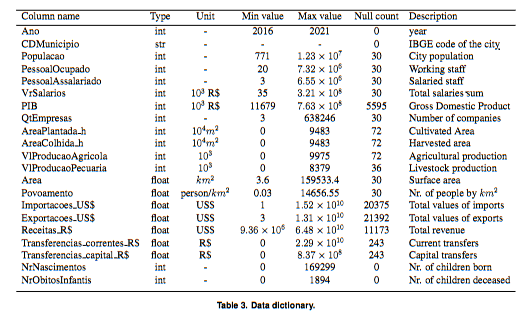

**OBS:** É importante destacar que essa célula de código só será executada em momentos de análises isoladas destes atributos descritos, visto que a retirada desses objetos possuem grande impacto na quantidade de dados totais, e consequentemente em análises mais amplas (em tais análises todos os atributos foram transformados de "nan" em valor 0, assim como feito em outra célula).

In [ ]:

dados[["Importacoes_US$", "Receitas_R$", "Exportacoes_US$"]] #Sem tratar Retorna 33419

dados = dados.drop(dados[dados["Importacoes_US$"].isna()].index) #Retira objetos com esse campo vazio
dados = dados.drop(dados[dados["Exportacoes_US$"].isna()].index) #Retira objetos com esse campo vazio
dados = dados.drop(dados[dados["Receitas_R$"].isna()].index) #Retira objetos com esse campo vazio

dados[["Importacoes_US$", "Receitas_R$", "Exportacoes_US$"]] #Retorna 8372 objetos


KeyError: "None of [Index(['Importacoes_US$', 'Receitas_R$', 'Exportacoes_US$'], dtype='object')] are in the [columns]"

* Análises dos dados em busca de ruidos/outliers:

Todos os atributos de "nan" foram transformados em valor 0

In [ ]:
for coluna in dados.columns[0:19]:#As duas ultimas colunas sao dos nomes dos municipios e da regiao, nao faz sentido colocar 0
   dados[coluna] = dados[coluna].astype(str).replace("nan", 0)# Substitui valores "nan" por 0

dados

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932.0,854,537,13692,111190,2520,380,380,...,0.0,25511889.220,18911068.4,1665392.54,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505.0,5680,4778,104977,554663,6710,30,30,...,1777256.0,63002672.933,45304154.44,538882.6,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193.0,668,580,12519,62441,830,0,0,...,0.0,30492825.449,21861157.95,1048458.04,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279.0,3087,2669,80161,403121,2900,0,0,...,0.0,140538926.872,100508822.36,871234.34,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534.0,212,183,5309,48551,340,940,340,...,0.0,15541375.953,13178989.76,8037.87,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171.0,4630,4360,10502,0,320,0,0,...,0.0,0,0.0,0.0,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265.0,4280,3830,9932,0,380,0,0,...,0.0,0,0.0,0.0,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061.0,221,1773,43093,192775,2890,0,0,...,0.0,0,0.0,0.0,320,10,180.059,PE,Fernando de Noronha,Nordeste
33418,2020,1503002,707.0,5380,5140,12207,63579,320,0,0,...,0.0,0,0.0,0.0,1490,40,0.601,PA,Faro,Norte




Durante uma análise (com base na tabela fornecida pelo artigo) para observar qual a cidade que teve maior produçao agricola da historia do dataset teve-se como resultado a cidade de Cristalina-GO no ano de 2018. Posteriormente, ao se analisar o resultado da média de cada ano, observei que os dados do atributo VlProducaoAgricola da cidade no ano de 2020 podem ser algum ruido. O ano de 2020 vai contra a média dos outros anos do município.

Em conversa com o grupo, ficou decidido em manter tais dados para futura análise para entender se realmente se tratam de um dado com ruido ou se houve algum acontecimento que influenciou nessa diminuição da produção agricola na cidade.

In [ ]:
dados_producao = dados[dados["VlProducaoAgricola"] == 9975] #O 9975 foi retirado da tebela do artigo. Essa cidade no ano de 2020 pode ser considerada um outlier
dados_producao[["VlProducaoAgricola", "Regiao", "Ano", "Municipio", "UF"]]

dados_cidade = dados[dados["Municipio"]== "Cristalina"]
dados_cidade.groupby(["Ano"]) [["VlProducaoAgricola"]].mean()


,VlProducaoAgricola
Ano,
2016,5942.0
2017,5125.0
2018,9975.0
2019,8456.0
2020,284.0
2021,9861.0


In [ ]:
# Codigo para caso futuramente seja decidido retirar os dados do munícipio em 2020
dados = dados.drop(dados[(dados["Municipio"] == "Cristalina") &
                         (dados["UF"] == "GO") &
                         (dados["Ano"] == 2020)].index)


In [ ]:
#OUTRAS ANÁLISES

#Trabalhando com alguns valores que podem ser úteis para futuras análises
#Preenchendo valores que estão ausentes na coluna do PIB com a média dela
dados['PIB'] = dados['PIB'].fillna(dados['PIB'].mean())

O grupo acredita que esses atributos não serão utilizados no momento, no entanto, em análises futuras esse pensamento pode mudar e os dados retornarem para o dataset.

In [ ]:
#Retirada dos atributos referentes ao numero de obitos infantis e do numero de Nascimentos
dados = dados.drop(columns=['NrObitosInfantis'])
dados = dados.drop(columns=['NrNascimentos'])

dados

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Area,Importacoes_US$,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932.0,854,537,13692,111190,2520,380,380,...,185.0,40.0,0.0,25511889.220,1.891107e+07,1665392.54,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505.0,5680,4778,104977,554663,6710,30,30,...,499.5,60.0,1777256.0,63002672.933,4.530415e+07,538882.60,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193.0,668,580,12519,62441,830,0,0,...,414.8,70.0,0.0,30492825.449,2.186116e+07,1048458.04,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279.0,3087,2669,80161,403121,2900,0,0,...,937.5,97.0,0.0,140538926.872,1.005088e+08,871234.34,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534.0,212,183,5309,48551,340,940,340,...,1559.1,107.0,0.0,15541375.953,1.317899e+07,8037.87,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171.0,4630,4360,10502,0,320,0,0,...,86.1,0.0,0.0,0,0.000000e+00,0.00,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265.0,4280,3830,9932,0,380,0,0,...,9175.9,0.0,0.0,0,0.000000e+00,0.00,1.010,AP,Amapá,Norte
33417,2019,2605459,3061.0,221,1773,43093,192775,2890,0,0,...,17.0,0.0,0.0,0,0.000000e+00,0.00,180.059,PE,Fernando de Noronha,Nordeste
33418,2020,1503002,707.0,5380,5140,12207,63579,320,0,0,...,11770.6,0.0,0.0,0,0.000000e+00,0.00,0.601,PA,Faro,Norte


* Criação de novos atributos:

Utilizando de dados fornecidos por esse dataset tambem foram construidos novos atributos para facilitar futuras análises 🎄

In [ ]:
dados['PIB_PerCapita'] = dados['PIB'] / dados['Populacao']
dados["Densidade_Populacional"] = dados['Populacao'] / dados['Area']
dados['Proporcao_PessoalAssalariado'] = dados['PessoalAssalariado'] / dados['PessoalOcupado']
dados['Proporcao_Area_Plantada'] = dados['AreaPlantada_h'] / dados['Area']
dados.columns #Exibe as colunas existentes

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

In [ ]:


dados.to_csv('dados_limpos.csv', index=False)
import os
print(os.getcwd())


/content
